# Outlier/Anomaly/Novelty Detection

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
# using random numbers to generate real values

np.random.seed(1)
data = np.random.randn(50000)  * 25 + 25
print(data)

[65.60863409  9.70608966 11.79570619 ... 10.22545501 48.08853395
 44.81372277]


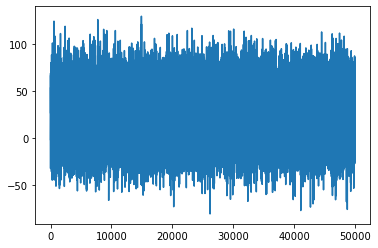

In [102]:
plt.plot(data);

#### Method-1 Using Standard deviation to detect outlier

In [94]:
# Function for Detection Outlier on 1-D dataset.

def outlier_detect(dataset):
    '''if in a normal distribution of variable, 
   value > mean + 3* std  or value < mean -  3 * std, then that value should be treated as outlier
'''
    outlier_list = []
    # Set upper and lower limit to 3 standard deviation
    dataset_std = np.std(dataset)
    dataset_mean = np.mean(dataset)
    
    lower_limit  = dataset_mean - dataset_std * 3 
    print("lower_limit:",lower_limit)
    upper_limit = dataset_mean + dataset_std * 3
    print("upper_limit:",upper_limit)
  
    # Get outliers
    for val in dataset:
        if val > upper_limit or val < lower_limit:
            outlier_list.append(val)
    return outlier_list

In [95]:
%%time

outlier_list=outlier_detect(data)

print(len(outlier_list))

lower_limit: -49.95602832012464
upper_limit: 100.14545280681892
142
Wall time: 15 ms


#### Method-2 Using Box plot

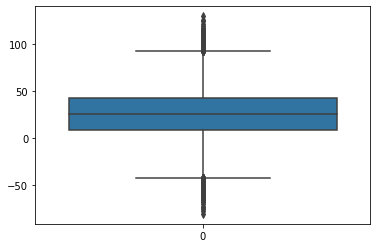

In [96]:
sns.boxplot(data=data);

#### Method-3 Using Z-Score

In [97]:
def outlier_z_score(data,threshold):
    data_mean = np.mean(data)
    data_std = np.std(data)
    
    z_scores = [(val-data_mean)/data_std for val in data]

    return list(np.where(np.abs(z_scores)>threshold))

In [98]:
%%time
outliers = outlier_z_score(data,3)
print(outliers)

[array([  314,   565,   732,   892,  1463,  1489,  1633,  2268,  2395,
        2822,  3048,  4416,  5348,  5424,  5915,  5920,  6516,  6954,
        7113,  7272,  7408,  7636,  7755,  8009,  8184,  8726,  8957,
        9236,  9550, 10370, 10646, 10999, 11061, 11456, 11703, 12236,
       12905, 13326, 14062, 14276, 14326, 14926, 14944, 15024, 15210,
       15316, 15423, 17075, 17387, 18000, 18556, 19144, 19432, 19634,
       19735, 20023, 20171, 20234, 20804, 21118, 22307, 22477, 23205,
       23602, 23619, 24878, 24911, 25377, 25801, 26128, 26206, 26218,
       26707, 26717, 26850, 26888, 27425, 27486, 28969, 29267, 29320,
       29554, 29556, 29928, 30083, 30149, 31812, 31862, 32119, 32174,
       32416, 32501, 32523, 32745, 32945, 32984, 33466, 33514, 33806,
       33873, 34835, 35411, 35496, 36115, 36469, 36558, 36903, 36941,
       37067, 39550, 39866, 40198, 41027, 41103, 41452, 42698, 42709,
       43122, 43163, 43274, 44023, 44529, 44844, 45152, 46266, 46310,
       46320, 46399

#### Method- 4 Using Modified Z-Score

In [99]:
def outlier_modified_z_score(data,threshold):
    data_median = np.median(data)
    data_median_abs_dev = np.median([np.abs(val - data_median) for val in data])
    
    modified_z_scores = [0.6745 *(val - data_median)/data_median_abs_dev for val in data]
    #outiers_list = [z for z in modified_z_scores if np.abs(z)>threshold]

    return list(np.where(np.abs(modified_z_scores)>threshold))

In [100]:
%%time
outliers = outlier_modified_z_score(data,3.5)
print(outliers)

[array([  565,  2395,  7755,  8726,  9236,  9550, 10646, 14926, 14944,
       20234, 22477, 23205, 26206, 29267, 29554, 29556, 30083, 31812,
       32416, 39866, 41103, 42698, 42709, 43122, 43274, 44529, 46822,
       48609, 48675, 48752], dtype=int64)]
Wall time: 161 ms


#### Method- 5 Using IQR

In [165]:
def outlier_iqr(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    
    lwr_bound = q1 - (1.5 * iqr)
    upr_bound = q3 + (1.5 * iqr)
    
    outliers_list = [val for val in list(data) if val>upr_bound or val<lwr_bound]
    
    #return np.where((data > upper_bound) | (data < lower_bound))
    return outliers_list

In [166]:
%%time
outliers = outlier_iqr(data)
len(outliers)

Wall time: 8.98 ms


359

In [167]:
print(outliers)

[-44.8271250036635, 100.77142780930076, -44.56336169132307, 123.96506760094908, -44.774910167346164, 108.0269689042591, -42.45904354165117, -51.34410951065762, 97.9327190718277, 95.68249485149126, 92.7987468473789, -53.83393625477622, -50.400799630232456, 110.81658579488898, -44.786100948045814, 96.09846424348245, -51.60353390262752, 118.50622259261473, 93.23655338612735, 97.35965479067274, 103.37618350219768, 105.95857991880942, -43.47854347409469, -46.80125625718166, -42.75984351168751, 94.68403619876653, 92.65312305326545, 97.33981379572423, 93.55388029205672, 96.19455293797068, 94.42632482860131, -45.0390554131381, 95.47717736389787, -56.32585587441548, 92.93465607838185, -42.99845227392592, -47.862472933927506, 96.36060203624682, 93.27113277317217, 103.30074320351264, 100.31886420593081, 95.54472200913231, -46.12343985038761, -49.62090340677105, -54.765408670602014, -56.51537739441348, -42.47297457877849, -46.27673856504849, -42.708482858854964, -48.13262590124498, 110.10755689372